In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#create a model class that inherits nn.Module
class Model(nn.Module):
  #Input layer(4 features of flower Sepal length,Sepal width,Petal length and Petal width)
  #Then there is hidden layer 1 having some no. of neurons in it.
  #then there is hidden layer 2 having some no. of neurons in it.
  #then output layer which classifies into 3 classes(Iris setosa, Iris Versicolor, Iris Virginica)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1=nn.Linear(in_features,h1) #fc->fully connected
    self.fc2=nn.Linear(h1,h2);
    self.out=nn.Linear(h2,out_features)
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)
    return x

In [3]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model=Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df=pd.read_csv(url)

In [14]:
df.head(70)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
65,6.7,3.1,4.4,1.4,versicolor
66,5.6,3.0,4.5,1.5,versicolor
67,5.8,2.7,4.1,1.0,versicolor
68,6.2,2.2,4.5,1.5,versicolor


In [15]:
df['species']=df['species'].replace('setosa',0.0)
df['species']=df['species'].replace('versicolor',1.0)
df['species']=df['species'].replace('virginica',2.0)
#changing species column from strings to integers

In [16]:
df.head(90)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
85,6.0,3.4,4.5,1.6,1.0
86,6.7,3.1,4.7,1.5,1.0
87,6.3,2.3,4.4,1.3,1.0
88,5.6,3.0,4.1,1.3,1.0


In [18]:
df.tail(70)

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,1.0
81,5.5,2.4,3.7,1.0,1.0
82,5.8,2.7,3.9,1.2,1.0
83,6.0,2.7,5.1,1.6,1.0
84,5.4,3.0,4.5,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [19]:
X=df.drop('species',axis=1)
y=df['species']

In [20]:
#converting these values to numpy arrays
X=X.values
y=y.values

In [21]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [25]:
#convert X features to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [26]:
#convert y labels to long tensors
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
'''
For FloatTensor , you can do math operations (multiplication, addition, division etc.)
with a scalar of type int or float .
But for LongTensor , you can only do math operation with int scalar but not float .
'''

'\nFor FloatTensor , you can do math operations (multiplication, addition, division etc.) \nwith a scalar of type int or float . \nBut for LongTensor , you can only do math operation with int scalar but not float .\n'

In [33]:
#set the criterion of model to measure the error, how far off the predictions are from data.
criterion=nn.CrossEntropyLoss()
#Cross-entropy loss is used when adjusting model weights during training. The aim is to minimize the loss—the smaller the loss, the better the model.
#A perfect model has a cross-entropy loss of 0. It typically serves multi-class and multi-label classifications.
#optimizer=Adam,lr=learning rate (if error does not go after a bunch of iteration or epochs)
#lower the learning rate the longer it takes to train the model
#The Adam optimizer, short for “Adaptive Moment Estimation,” is an iterative optimization algorithm used to minimize the loss function during the training of neural networks.
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [32]:
# model.parameters are actually fc1,fc2 and out layers.
# relu(x) = { 0 if x<0, x if x > 0}

In [35]:
#training our model
#epochs: 1 run through all training data in our network.
epochs=100
losses=[]
for i in range(epochs):
  #go forward and get prediction
  y_pred=model.forward(X_train) #get predicted result
  #measure the loss/error
  loss=criterion(y_pred,y_train) #predicted values vs y_train
  #keep track of losses
  losses.append(loss.detach().numpy())
  #print every 10 epochs
  if i%10==0:
    print(f'Epoch:{i} and loss:{loss}')
  #do some back propagation: take the error rate of forward propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
#zero_grad clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).
#loss.backward() computes the derivative of the loss w.r.t. the parameters (or anything requiring gradients) using backpropagation.
#opt.step() causes the optimizer to take a step based on the gradients of the parameters.

Epoch:0 and loss:1.1251550912857056
Epoch:10 and loss:1.0096259117126465
Epoch:20 and loss:0.8157405853271484
Epoch:30 and loss:0.585706353187561
Epoch:40 and loss:0.3999636471271515
Epoch:50 and loss:0.26768800616264343
Epoch:60 and loss:0.17942361533641815
Epoch:70 and loss:0.12151690572500229
Epoch:80 and loss:0.0860118493437767
Epoch:90 and loss:0.06520850956439972


Text(0.5, 0, 'epochs')

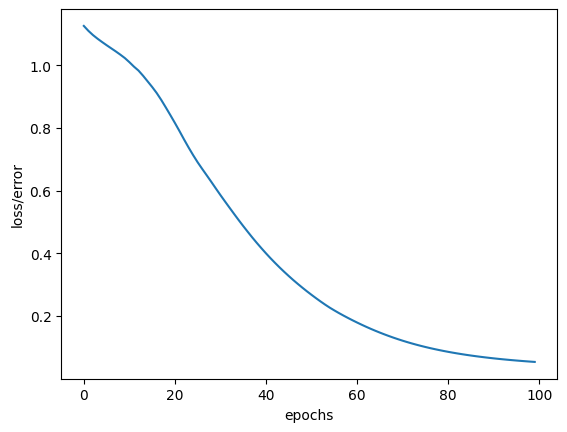

In [36]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")

In [37]:
#Evaluate model on test dataset
with torch.no_grad():  #turns off back propagation
  y_eval=model.forward(X_test) #X_test are features from test set and y_eval will be predictions
  loss=criterion(y_eval,y_test) #find the loss or error

In [38]:
loss

tensor(0.1315)

In [39]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    #it will tell us what type of flower class according to network
    print(f'{i+1}.) {str(y_val)}')

1.) tensor([-5.8760,  4.4628,  6.5124])
2.) tensor([-7.5436,  4.1670,  9.7255])
3.) tensor([-8.4504,  5.1271, 10.1987])
4.) tensor([-4.3398,  5.6267,  2.5608])
5.) tensor([-7.1825,  4.8754,  8.2992])
6.) tensor([-3.3974,  5.3463,  1.2803])
7.) tensor([-5.9231,  4.9822,  5.9997])
8.) tensor([-4.2881,  5.7003,  2.3889])
9.) tensor([-6.5356,  4.9257,  7.1260])
10.) tensor([-8.0509,  4.4129, 10.3286])
11.) tensor([-5.6762,  4.9500,  5.6215])
12.) tensor([ 4.5662, -2.2476, -2.8911])
13.) tensor([ 4.2571, -1.9967, -2.7330])
14.) tensor([-2.1108,  4.0515,  0.5799])
15.) tensor([ 3.4575, -1.2098, -2.3514])
16.) tensor([-5.4724,  5.1165,  5.0934])
17.) tensor([ 4.0557, -1.7949, -2.6492])
18.) tensor([-5.8075,  4.6053,  6.2458])
19.) tensor([ 4.4343, -2.1392, -2.8242])
20.) tensor([ 3.4528, -1.2514, -2.3660])
21.) tensor([-2.6189,  4.5619,  0.8574])
22.) tensor([-7.7412,  4.7377,  9.4199])
23.) tensor([ 3.5744, -1.3221, -2.4135])
24.) tensor([ 4.5365, -2.2383, -2.8684])
25.) tensor([-2.6579,  4.

In [40]:
#above 3 columns correspond to classes 0,1 and 2.
#the highest no. is the output of our network.
#0->setosa, 1->versicolour, 2->virginica

In [41]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    #it will tell us what type of flower class according to network
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')
    #y_test is the actual output from the dataset values.

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0
21.) tensor([-2.6189,  4.5619,  0.8574]) 	 1
22.) tensor([-7.7412,  4.7377,  9.4199]) 	 2
23.) tensor([ 3.574

In [42]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    #it will tell us what type of flower class according to network
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')
    #y_test is the actual output from the dataset values.
    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(f'No. of correct values: {correct}.')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0
20.) tensor([ 3.4528, -1.2514, -2.3660]) 	 0
21.) tensor([-2.6189,  4.5619,  0.8574]) 	 1
22.) tensor([-7.7412,  4.7377,  9.4199]) 	 2
23.) tensor([ 3.574

In [43]:
new_iris=torch.tensor([4.7,3.2,1.3,0.2])

In [44]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5365, -2.2383, -2.8684])


In [45]:
#the 3 values correspond rspectively to classes 0, 1 and 2.
#highest values is of class 0 => so it is classified as setosa.

In [46]:
new_iris=torch.tensor([5.9,3.0,5.1,1.8])

In [47]:
with torch.no_grad():
  print(model(new_iris))

tensor([-5.9944,  4.5077,  6.6792])


In [48]:
#the 3 values correspond rspectively to classes 0, 1 and 2.
#highest values is of class 2 => so it is classified as virginica.

In [49]:
#save our NN Model.
torch.save(model.state_dict(),'IRIS_Pytorch_Neural_Network.pt')

In [50]:
#load the saved model
new_model=Model()
new_model.load_state_dict(torch.load('IRIS_Pytorch_Neural_Network.pt'))

<All keys matched successfully>

In [51]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [52]:
#above is to check it loaded correctly.